# MATH 210 Introduction to Mathematical Computing

## March 22, 2017

1. Solving systems of first order ODEs
2. Solving higher order ODEs

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.integrate as spi
import scipy.linalg as la

In [4]:
from sympy.integrals import integrate

## 1. Solving systems of first order ODEs

A system of first order ODEs is a system of equations involving unknown functions and their derivatives.

For example, consider a 2D linear system of equations

$$
y_1' = y_1 + y_2
$$

$$
y_2' = -y_1 + 2y_2
$$

Let's use `odeint` to numerically solve this system:

In [5]:
def f(y,t):
    return [y[0]+y[1], -y[0]+2*y[1]]

In [6]:
y0 = [1,1]

In [7]:
t = np.linspace(0,2,100)

In [8]:
Y = spi.odeint(f,y0,t)

In [12]:
Y.shape

(100, 2)

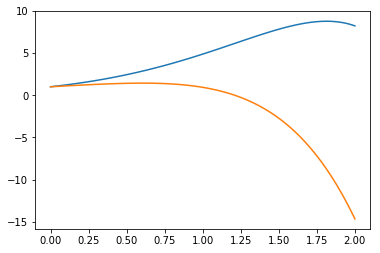

In [14]:
y1 = Y[:,0]
y2 = Y[:,1]
plt.plot(t,y1,t,y2)

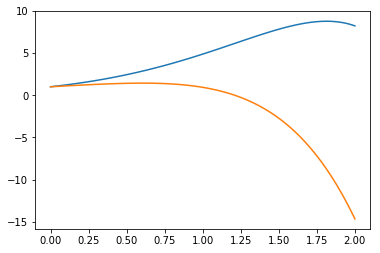

In [11]:
plt.plot(t,Y)

Let's solve this system explicitly using the eigenvalues and eigenvectors of $A=\begin{bmatrix} 1 & 1 \\ -1 & 2 \end{bmatrix}$

$$
\mathbf{y} = c_1e^{\lambda_1 t} \mathbf{v_1} + c_2e^{\lambda_2 t} \mathbf{v_2}
$$

In [18]:
# compute eigenvalues and eigenvectors of coefficient matrix
A = np.array([[1,1],[-1,2]])
evals, evecs = la.eig(A)

In [21]:
# solve for c_1 and c_2 using intial conditions
y0 = np.array([[1],[1]])
C = la.solve(evecs,y0)

In [23]:
t = np.linspace(0,2,100)

/opt/conda/lib/python3.5/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


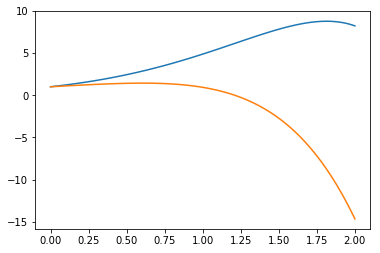

In [29]:
y_1 = C[0]*np.exp(evals[0]*t)*evecs[0,0] + C[1]*np.exp(evals[1]*t)*evecs[0,1]
y_2 = C[0]*np.exp(evals[0]*t)*evecs[1,0] + C[1]*np.exp(evals[1]*t)*evecs[1,1]
plt.plot(t,y_1,t,y_2);
# NOTE: we get an error since we have complex eigenvalues

### Example

Let's use `odeint` to numerically solve the nonlinear system

$$
y_1' = y_1^2-y_2
$$

$$
y_2' = y_1+y_2^2
$$

In [43]:
def f(y,t):
    return [y[0]**2-y[1], y[0]+y[1]**2]

In [57]:
y0 = [-1/2,1/2]

In [61]:
t = np.linspace(0,2,100)

In [62]:
Y = spi.odeint(f,y0,t)

Let's plot the solution as a trajectory $(y_1(t), y_2(t))$

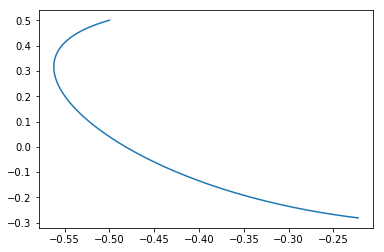

In [63]:
plt.plot(Y[:,0],Y[:,1])

## 2. Solving higher order ODEs

Recall from last time, to solve a second order equation we need to rewrite it as a first order system.

For example, $y''+1 = 0$ we introduce two new variables $u_1=y$ and $u_2=y'$.

In [64]:
def f(u,t):
    return [u[1], -u[0]]

In [65]:
u0 = [0,1]

In [66]:
t = np.linspace(0,2*np.pi,100)

In [70]:
U = spi.odeint(f,u0,t)

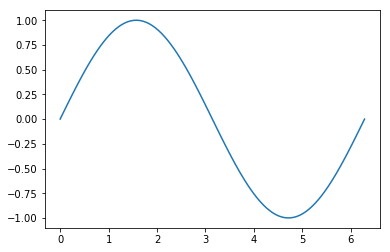

In [71]:
plt.plot(t,U[:,0])

Let's write a function called `vibration` which takes parameters m,c,k,g, y_0, a and b and plots the solution of the equation

$$
my''+cy'+ky=g(t)
$$
Over interval [a,b] with inital condition y_0

In [77]:
def vibration(m,c,k,g,y0,a,b):
    
    # Introduce varibles: u_1 = y, u_2 = y'
    def f(u,t):
        return [u[1], 1/m * (g(t)-k*u[0]-c*u[1])]
    
    u0 = y0
    t = np.linspace(a,b,int(100*(b-a)))
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,0])

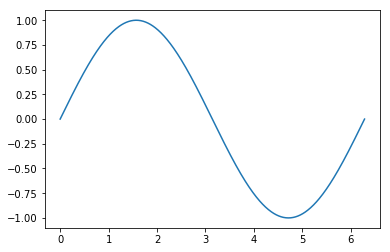

In [78]:
vibration(1,0,1,lambda x:0,[0,1],0,2*np.pi)

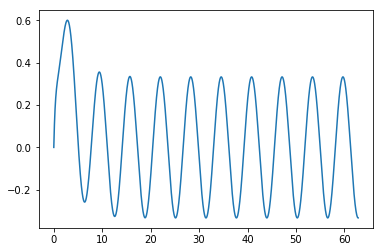

In [79]:
vibration(1,3,1,lambda x : np.sin(x),[0,1],0,20*np.pi)